<a href="https://colab.research.google.com/github/mcmahongg/colab/blob/main/xeno_canto_basic_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A xeno-canto Example with librosa

### xeno-canto: https://www.gbif.org/dataset/b1047888-ae52-4179-9dd5-5448ea342a24
### Dataset website: https://www.xeno-canto.org/

In [1]:
#! ls -la /


In [2]:
!rm -rf /content/xeno-canto-py
!git clone https://github.com/ntivirikin/xeno-canto-py

Cloning into 'xeno-canto-py'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 176 (delta 33), reused 37 (delta 17), pack-reused 118
Receiving objects: 100% (176/176), 52.79 KiB | 1.39 MiB/s, done.
Resolving deltas: 100% (96/96), done.


In [3]:
!ls -la /content/xeno-canto-py

total 48
drwxr-xr-x 3 root root 4096 Apr  5 00:45 .
drwxr-xr-x 1 root root 4096 Apr  5 00:45 ..
-rw-r--r-- 1 root root  483 Apr  5 00:45 CHANGES.txt
drwxr-xr-x 8 root root 4096 Apr  5 00:45 .git
-rw-r--r-- 1 root root  108 Apr  5 00:45 .gitignore
-rw-r--r-- 1 root root 1074 Apr  5 00:45 LICENSE
-rw-r--r-- 1 root root   45 Apr  5 00:45 MANIFEST.in
-rw-r--r-- 1 root root 2399 Apr  5 00:45 README.md
-rw-r--r-- 1 root root  474 Apr  5 00:45 setup.py
-rw-r--r-- 1 root root 3071 Apr  5 00:45 test.py
-rw-r--r-- 1 root root 7856 Apr  5 00:45 xenocanto.py


Import xeno canto API for Python: https://pypi.org/project/xeno-canto/

In [4]:
!pip install xeno-canto

  Created wheel for xeno-canto: filename=xeno_canto-2.0.1-cp37-none-any.whl size=5591 sha256=08b4ab828096a077e9b162daf97ad913756f89ccf7bc764fad5246f8b578feb2
  Stored in directory: /root/.cache/pip/wheels/a0/cf/a7/8a2ad2ac46038cde3d2a33791d9711776d53ac9da92fb08c93
Successfully built xeno-canto


In [5]:
import xenocanto

In [6]:
# Install the librosa Python audio processing module
!pip install librosa

In [7]:
!rm -rf /content/colab
!git clone https://github.com/mcmahongg/colab

Cloning into 'colab'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 39 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (39/39), done.


In [8]:
!ls -la /content/colab


total 40196
drwxr-xr-x 3 root root     4096 Apr  5 00:46  .
drwxr-xr-x 1 root root     4096 Apr  5 00:45  ..
-rw-r--r-- 1 root root   444524 Apr  5 00:46  100Hz_44100Hz_16bit_05sec.wav
-rw-r--r-- 1 root root   441044 Apr  5 00:46  10kHz_44100Hz_16bit_05sec.wav
-rw-r--r-- 1 root root   441044 Apr  5 00:46  1kHz_44100Hz_16bit_05sec.wav
-rw-r--r-- 1 root root   444460 Apr  5 00:46  bird3.wav
-rw-r--r-- 1 root root  8503952 Apr  5 00:46  C-5_Galaxy_clip.wav
-rw-r--r-- 1 root root  8638276 Apr  5 00:46  car_wheel_bearing_.wav
-rw-r--r-- 1 root root     2557 Apr  5 00:46  dara.csv
-rw-r--r-- 1 root root  1719944 Apr  5 00:46  eqt-chromo-sc.wav
drwxr-xr-x 8 root root     4096 Apr  5 00:46  .git
-rw-r--r-- 1 root root 11007408 Apr  5 00:46  Lightning_startup1.wav
-rw-r--r-- 1 root root    37888 Apr  5 00:46  muscle_data_2017.xls
-rw-r--r-- 1 root root        7 Apr  5 00:46  README.md
-rw-r--r-- 1 root root  5716448 Apr  5 00:46  siren.wav
-rw-r--r-- 1 root root   288670 Apr  5 00:46  T08-violi

In [9]:
# Specify the MP3 file of interest
 
# The sample birdsong will be loaded from /content/colab - a cloned personal GitHub directory
# Example is a Eurasian curlew recorded in Portmarnock
 
SOUND_FILE='/content/colab/XC352832 - Eurasian Curlew - Numenius arquata arquata.mp3'
MP3_duration = 22.9 # duration in seconds

In [10]:
# Install mutagen - used to determine MP3 playing time
!pip3 install mutagen

     |████████████████████████████████| 225kB 5.7MB/s 


In [11]:
# Calculate the MP£ file length in seconds
import numpy as np
from mutagen.mp3 import MP3
audio = MP3(SOUND_FILE)
MP3_duration = np.round(audio.info.length, 1)
print('MP3 File Duration: ', MP3_duration, ' seconds')

MP3 File Duration:  22.9  seconds


In [12]:
# Import the Python plotting routines and other required modules required to use the librosa audio processing module
from matplotlib import pyplot as plt
 
import librosa
import librosa.display
import numpy as np

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


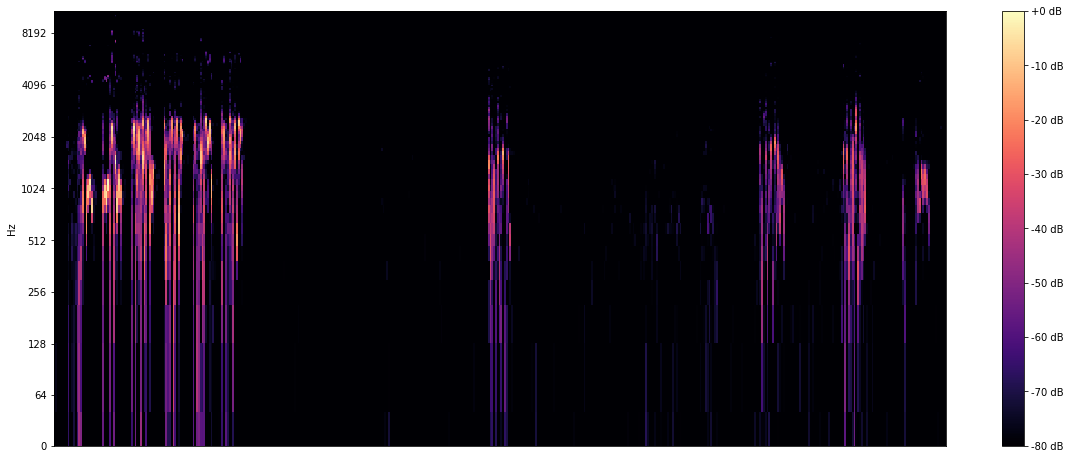

In [13]:
# Perform the audio analysis in librosa
 
#axis_type = 'linear' # 'linear' or 'log'
axis_type = 'log'
 
# Load the MP3 file
signal, sr = librosa.load(SOUND_FILE,duration=MP3_duration) # sr = sampling rate - calculated from the file
# Plot mel-spectrogram
N_FFT = 1024         
HOP_SIZE = 1024     
N_MELS = 128            
WIN_SIZE = 512     
WINDOW_TYPE = 'hann' 
FEATURE = 'mel'      
FMIN = 1400
 
S = librosa.feature.melspectrogram(y=signal,sr=sr,
                                    n_fft=N_FFT,
                                    hop_length=HOP_SIZE, 
                                    n_mels=N_MELS, 
                                    htk=True, 
                                    fmin=FMIN, 
                                    fmax=sr/2) 
 
plt.figure(figsize=(20, 8))
librosa.display.specshow(librosa.power_to_db(S**2,ref=np.max), fmin=FMIN,y_axis=axis_type)
plt.colorbar(format='%+2.0f dB')
plt.show()
print('')

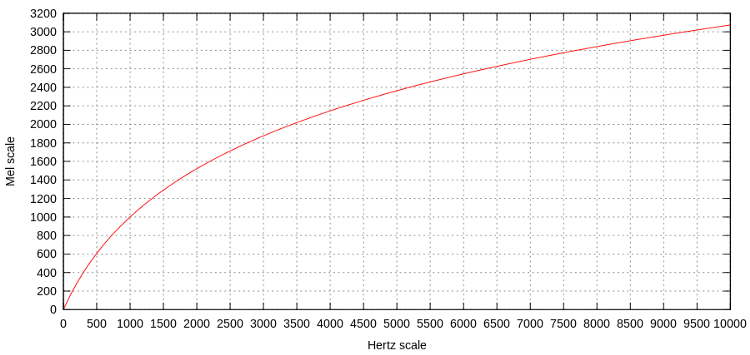



> The MEL Scale








In [14]:
# Play the soundfile

from IPython.display import Audio
Audio(SOUND_FILE)

In [15]:
# Check the Sampling Rate of the MP3 file
print('Sampling Rate Used: ', sr, ' Hz')

Sampling Rate Used:  22050  Hz
